# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

Dataset yang digunakan dalam proyek ini adalah Bank Transaction Dataset for Fraud Detection yang bersumber dari Kaggle (https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/data)

Dataset ini memberikan gambaran terperinci mengenai perilaku transaksional dan pola aktivitas keuangan. Dataset ini berisi 2.512 sampel data transaksi dan 16 atribut, yang mencakup berbagai atribut transaksi, demografi pelanggan, dan pola penggunaan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [136]:
bank_df = pd.read_csv('/content/drive/MyDrive/Laskar Ai/bank_transactions_data_2.csv')
bank_df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## Memahami Struktur Data



In [137]:
# Memahami struktur data
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

Dataset ini memiliki 2511 baris dan 16 kolom yang dapat digunakan untuk melakukan analisa transaksi yang dilakukan oleh customer. Dari 16 kolom tersebut terdapat 3 tipe data berbeda, yaitu:
- Float64: TransactionAmount dan Accountbalance
- Int64: CustomerAge, TransactionDuration, dan LoginAttempts
- Object: TransactionID, AccountID, TransactionDate, TranscationType, Location, DeviceID, IP Address, MerchantID, Channel, CustomerOccupation, dan PreviousTransactionDate

In [138]:
# Memastikan ketiadaan missing values
bank_df.isna().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


Berdasarkan hasil output di atas maka dapat dipastikan bahwa tidak ada missing values dalam dataset ini.

## Analisis Distribusi

In [139]:
# Menampilkan statistik deskriptif dari dataset untuk kolom numerik
bank_df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


Berdasarkan output di atas, informasi yang didapatkan adalah sebagai berikut:
-	TransactionAmount memiliki rata-rata USD 297 dengan rentang transaksi terkecil USD 0,26 hingga terbesar USD 1919. Selain itu, terdapat sektar 50% dari total transaksi dengan nilai transaksi di bawah USD 211.
-	Rata-rata usia customer adalah 44 tahun dengan usia termuda adalah 18 tahun dan tertua adalah 80 tahun.
-	Rata-rata lama waktu yang dibutuhkan untuk transaksi adalah 119 detik atau sekitar 2 menit. Waktu transaksi paling singkat adalah 10 detik dan paling lama adalah 300 detik.
-	Waktu percobaan login untuk transaksi paling singkat adalah 1 kali dan paling tinggi terdapat 5 kali percobaan login untuk 1 kali transaksi.
-	Rata-rata saldo dalam rekening nasabah adalah USD 5114, dengan saldo terendah adalah USD 101 dan tertinggi USD 14977. Terdapat sekitar 50% nasabah yang memiliki saldo di bawah USD 4735.

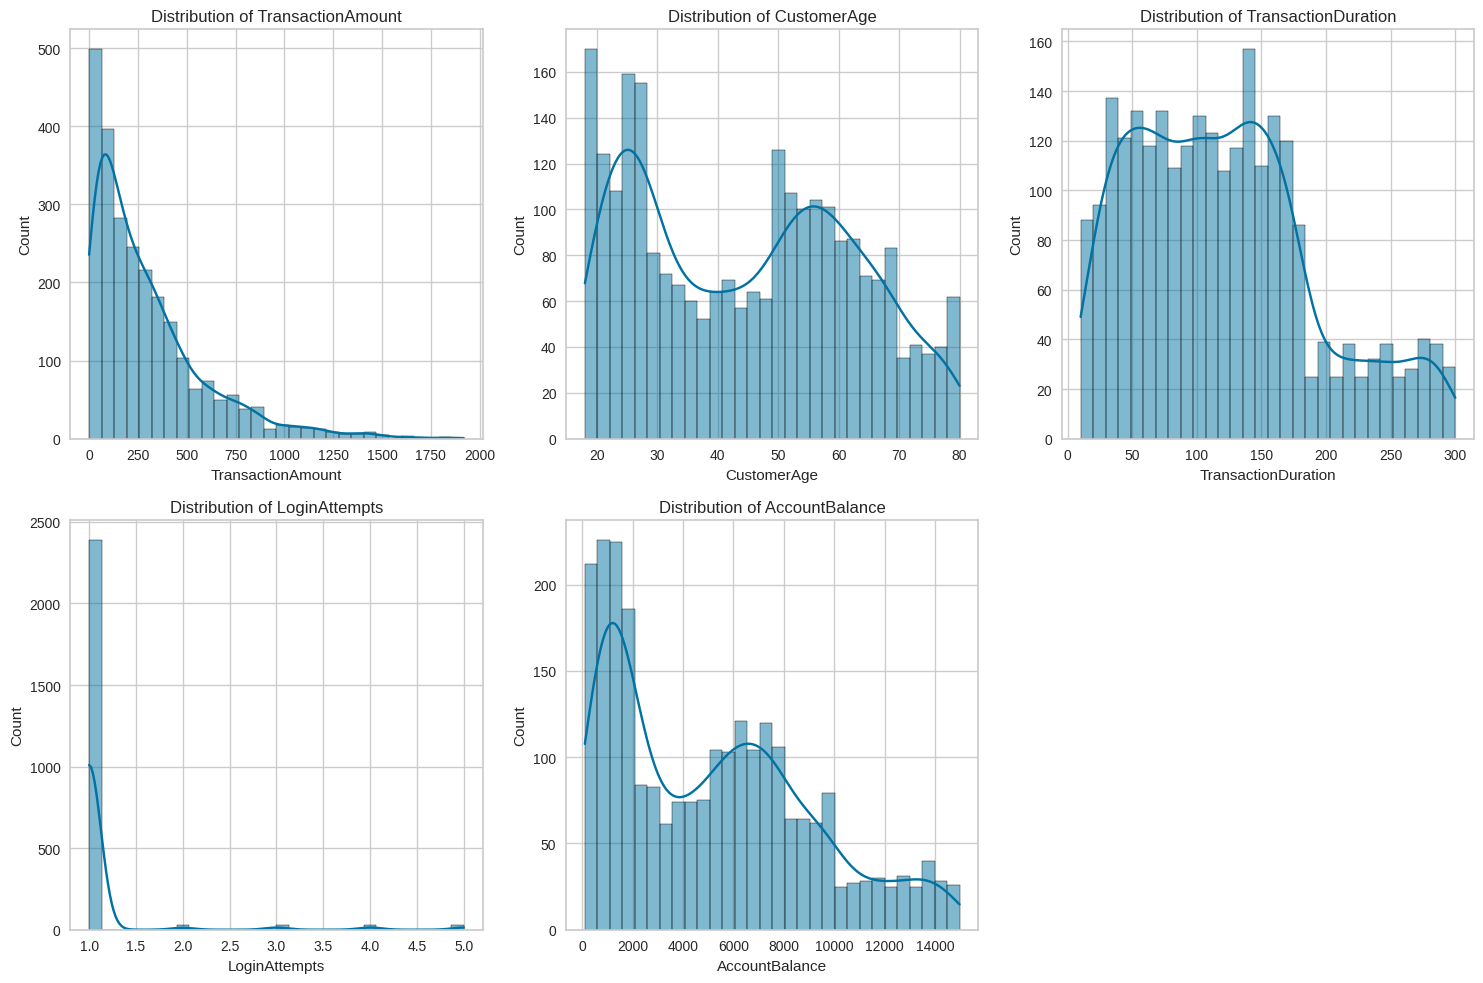

In [140]:
# Distribusi data untuk kolom numerik
numeric = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric, 1):
    plt.subplot(2, 3, i)
    sns.histplot(bank_df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

Terdapat variasi yang signifikan dari distribusi variabel numerik di atas.
- TransactionAmount: distribusinya sebagain besar terkonsentrasi di kiri dengan banyaknya nilai transaksi yang kecil sementara nilai transaksi >1500 USD jarang ditemukan.
- CustomerAge: distribusinya cenderung normal dengan lonjakan jumlah nasabah yang memiliki rentang usia di bawah 30 tahun.
- TransactionDuration: variabel ini cenderung terkonsentrasi di sebelah kiri yang menunjukkan mayoritas nasabah hanya memerlukan waktu sekitar 150 detik untuk bertransaksi.
- LoginAttempts: nilai tertentu mendominasi distribusinya yang menunjukkan pola tertentu saat percobaan login.
- AccountBalance: distribusinya cenderung normal dengan beberapa lonjakan pada nilai tertentu.

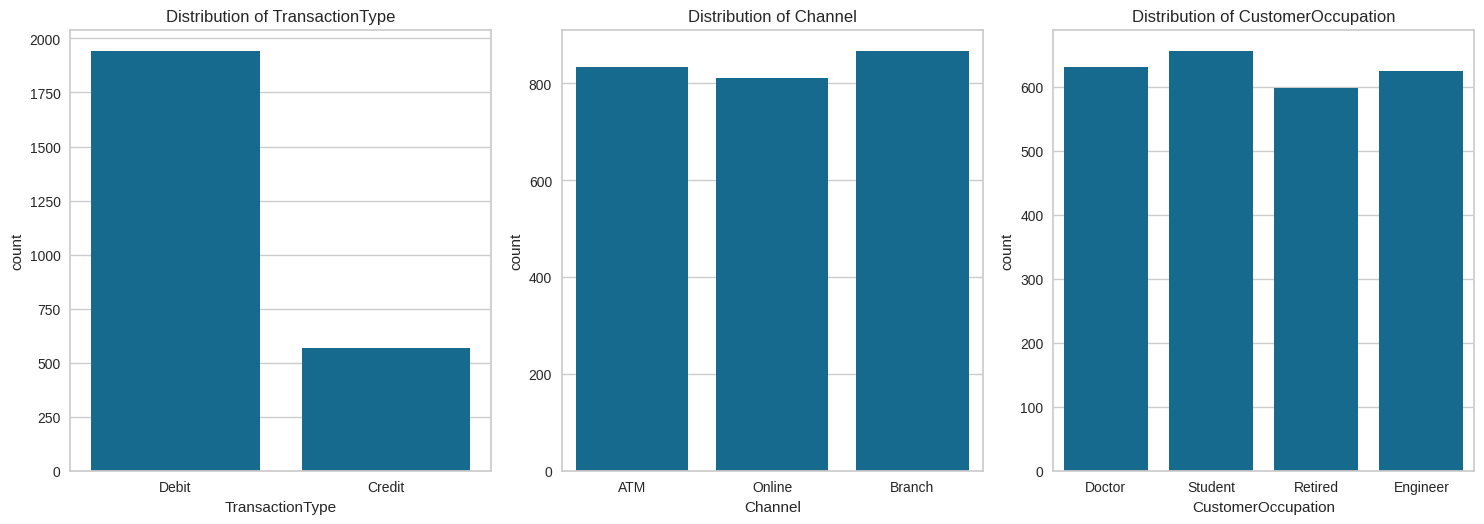

In [141]:
# Visualisasi data variabel kategorik TracsanctionType, Channel, CustomerOccupation

category = ['TransactionType', 'Channel', 'CustomerOccupation']

plt.figure(figsize=(15, 10))
for i, column in enumerate(category, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=bank_df[column])
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

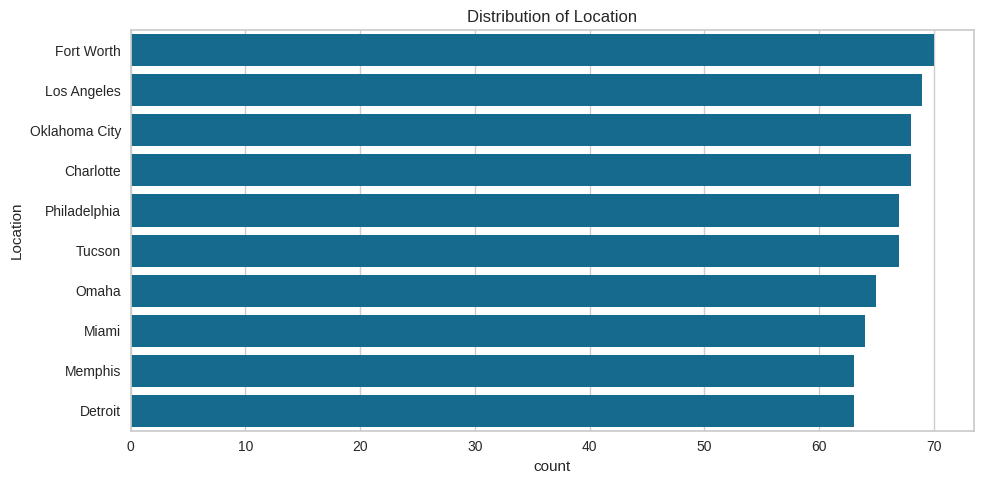

In [142]:
# Visualisasi data variabel kategorik Location

plt.figure(figsize=(10, 5))
top_10 = bank_df['Location'].value_counts().index[:10]
sns.countplot(y=bank_df['Location'], order=top_10)
plt.title(f'Distribution of Location')

plt.tight_layout()
plt.show()

Terdapat beberapa hal yang dapat disimpulkan dari data di atas/
- Debit merupakan jenis transaksi yang dominan digunakan oleh pelanggan.
- Variasi channel yang digunakan untuk bertransaksi cenderung tersebar merata. Pelanggan sedikit lebih banyak yang memilih untuk bertransaksi secara langsung di kantor cabang bank, disusul oleh channel ATM, dan transaksi yang dilakukan secara online.
- Jumlah pelanggan yang berstatus sebagai pelajar memiliki jumlah lebih banyak daripada pekerjaan lain.
- Transaksi yang dilakukan pelanggan tersebar di berbagai daerah. Terdapat 3 daerah yang memiliki frekuensi transaksi paling banyak, yaitu Fort Worth, Los Angeles, dan Oklahoma City.

## Analisis Korelasi

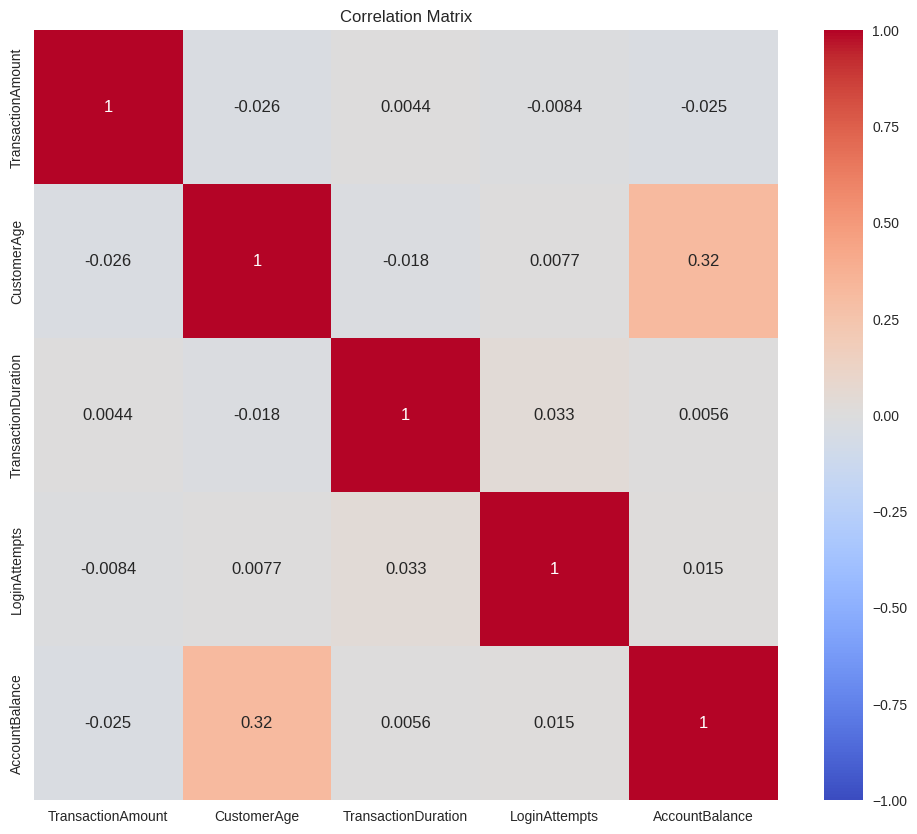

In [143]:
# Korelasi antar variabel numerik dengan correlation matrix

plt.figure(figsize=(12, 10))
correlation_matrix = bank_df.select_dtypes(include='number').corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Berdasarkan hasil correlation matriks variabel numerik, terdapat korelasi positif yang lemah di antara variabel tertentu, yaitu CustomerAge dan AccountBalance. Hal ini menunjukkan keduanya mungkin memiliki hubungan positif ketika CustomerAge meningkat yang akan diikuti dengan maningkatnya AccountBalance.
Sebaliknya, Terdapat korelasi negatif yang sangat lemah di antara beberapa variabel yang menunjukkan hubungan antara kedua variabel berkebalikan.

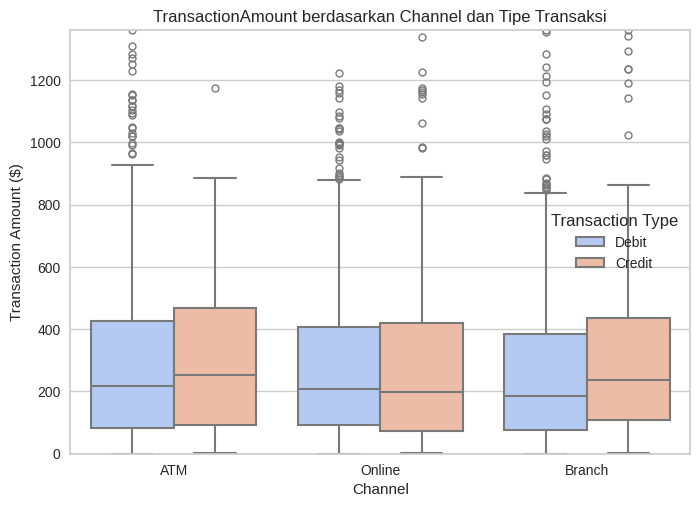

In [144]:
# TransactionAmount untuk setiap tipe dan channel transaksi

sns.boxplot(x='Channel', y='TransactionAmount', hue='TransactionType',
            data=bank_df, palette='coolwarm', linewidth=1.5, fliersize=5)
plt.ylim(0, bank_df['TransactionAmount'].quantile(0.99))
plt.legend(title='Transaction Type', fontsize=10)

plt.title('TransactionAmount berdasarkan Channel dan Tipe Transaksi')
plt.xlabel('Channel')
plt.ylabel('Transaction Amount ($)')
plt.show()

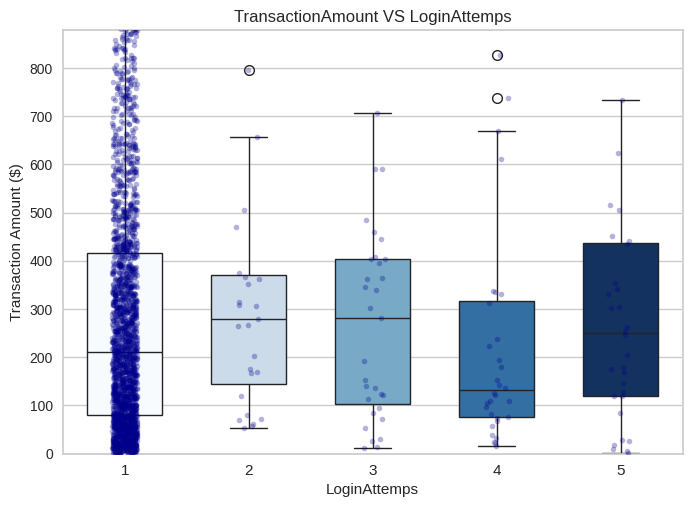

In [145]:
# Korelasi antara TransactionAmount dan LoginAttempts

sns.boxplot(x='LoginAttempts', y='TransactionAmount', data=bank_df, palette='Blues', width=0.6, hue='LoginAttempts', legend=False)
sns.stripplot(x='LoginAttempts', y='TransactionAmount', data=bank_df, size=4, color='darkblue', alpha=0.3, jitter=True)

plt.xticks(fontsize=11)
plt.ylim(0, bank_df['TransactionAmount'].quantile(0.95))

plt.title('TransactionAmount VS LoginAttemps')
plt.xlabel('LoginAttemps')
plt.ylabel('Transaction Amount ($)')
plt.show()

Gambar di atas menunjukkan distribusi TransansactionAmount untuk setiap percobaan login. Tingginya median nilai transaksi untuk percobaan login lebih dari 2 kali dapat menunjukkan adanya percobaan login yang gagal untuk transaksi besar dan menjadi potensi penipuan karena adanya perilaku yang tidak konsisten.

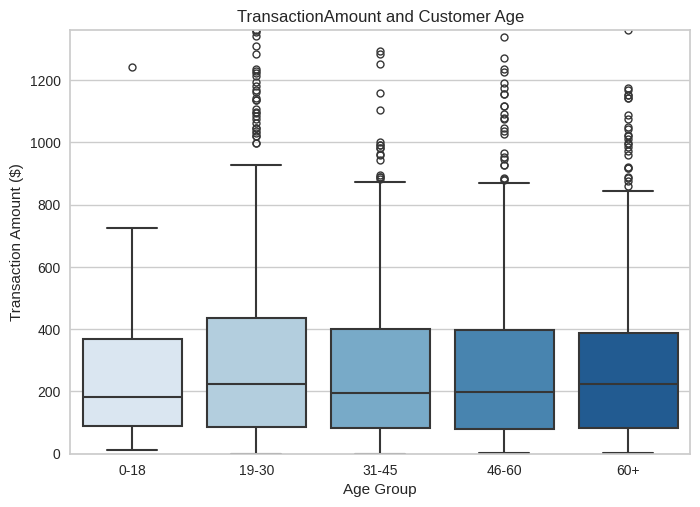

In [146]:
# TransactionAmount dan CustomerAge

# Mengelompokkan usia pelanggan
bank_df['AgeGroup'] = pd.cut(bank_df['CustomerAge'], bins=[0, 18, 30, 45, 60, 100],
                        labels=['0-18', '19-30', '31-45', '46-60', '60+'])

#Membuat boxplot TransactionAMount dan CustomerAge
sns.boxplot(x='AgeGroup', y='TransactionAmount', data=bank_df, palette='Blues', linewidth=1.5, fliersize=5, hue='AgeGroup', legend=False)
plt.ylim(0,bank_df['TransactionAmount'].quantile(0.99))

plt.title('TransactionAmount and Customer Age')
plt.xlabel('Age Group')
plt.ylabel('Transaction Amount ($)')
plt.show()

Berdasarkan boxplot di atas terlihat distribusi nilai transaksi untuk setiap kelompok usia. Jumlah transaksi yang besar di kelompok usia tua (berusia 60+ tahun) dapat menjadikan kelompok ini sebagai kelompok dengan risiko tinggi dan target penipuan.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

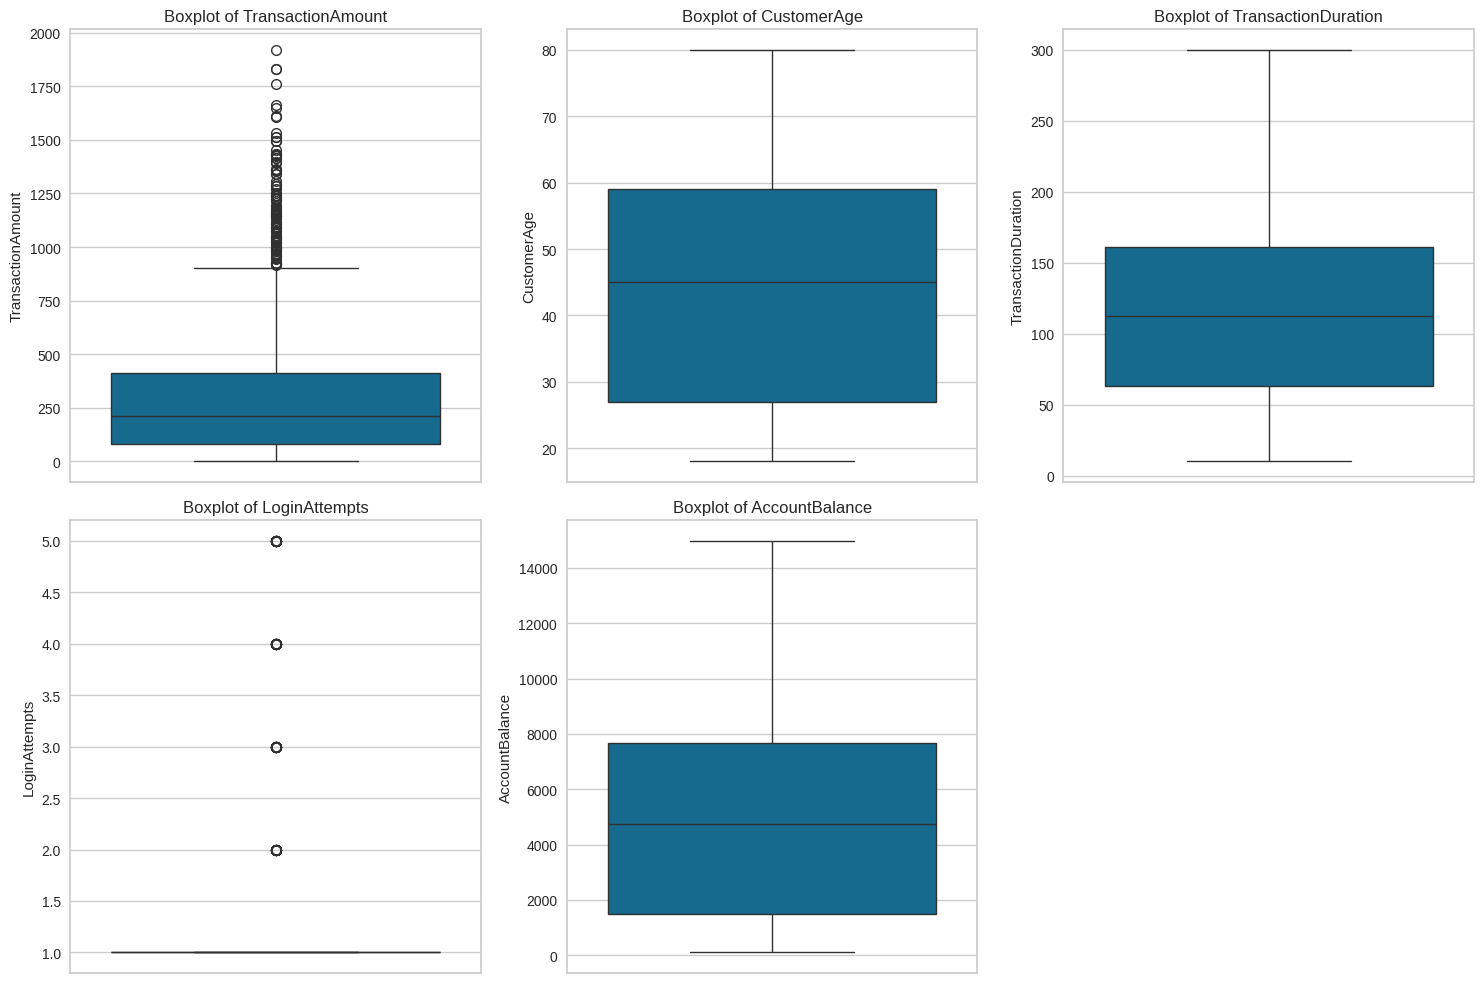

In [147]:
# Mendeteksi Outlier

numeric = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(bank_df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

Berdasarkan hasil di atas, diketahui terdapat outliers pada variabel TransactionAmount dan LoginAttempts. Berdasarkan data yang ada outliers ini tidak akan dihapus atau diubah karena dapat merupakan data yang benar dan dapat memengaruhi hasil analisis apabila dilakukan perubahan,

In [148]:
# Standarisasi variabel numerik

X_num = bank_df[numeric]
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)
X_num_scaled = pd.DataFrame(scaler.fit_transform(X_num), columns=X_num.columns)

In [149]:
# Encoding variabel kategori

categories = ['Channel', 'CustomerOccupation']
X_cat = pd.get_dummies(bank_df[categories], drop_first=False)

In [150]:
# Dataframe untuk clustering setelah distandarisasi

df_clustering = pd.concat([X_num_scaled, X_cat], axis=1)

df_clustering.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,-0.971275,1.423718,-0.552443,-0.206794,-0.000537,True,False,False,True,False,False,False
1,0.269440,1.311287,0.305314,-0.206794,2.216472,True,False,False,True,False,False,False
2,-0.586882,-1.443277,-0.909842,-0.206794,-1.023534,False,False,True,False,False,False,True
3,-0.387456,-1.049768,-1.353017,-0.206794,0.885797,False,False,True,False,False,False,True
4,-0.973468,-1.049768,1.120184,-0.206794,0.593589,False,False,True,False,False,False,True


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

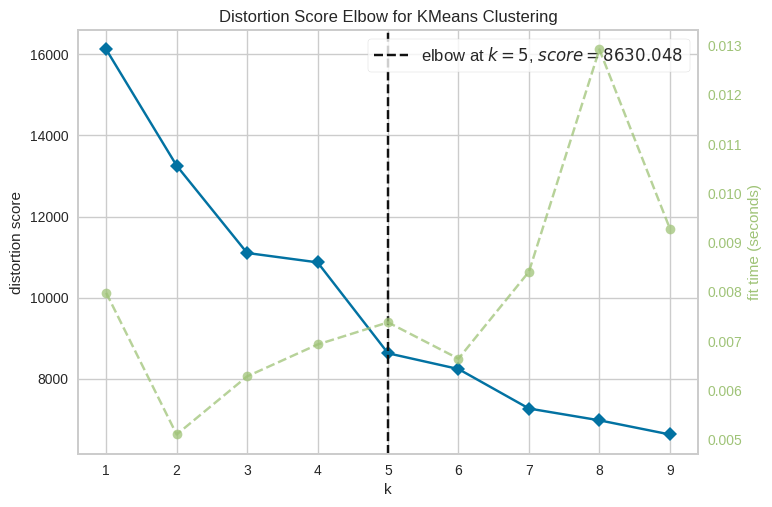

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [161]:
# Elbow Method

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(df_clustering)
visualizer.show()

In [162]:
# Inisialisasi dan melatih model KMeans dengan jumlah cluster 5 (hasil dari elbow method)

kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(df_clustering)
labels = kmeans.labels_

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [163]:
# Menghitung silhouette score

score = silhouette_score(df_clustering, labels)
print(f"Silhouette Score for k=5: {score:.4f}")

Silhouette Score for k=5: 0.2001


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [164]:
rf = RandomForestClassifier(random_state=0)
rf.fit(df_clustering, labels)

importances = rf.feature_importances_
feature_names = df_clustering.columns

#dataframe untuk fitur penting
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(feature_importance_df)

                        feature  importance
9   CustomerOccupation_Engineer    0.187030
10   CustomerOccupation_Retired    0.167720
4                AccountBalance    0.156041
1                   CustomerAge    0.143039
11   CustomerOccupation_Student    0.137726
8     CustomerOccupation_Doctor    0.093249
3                 LoginAttempts    0.071479
0             TransactionAmount    0.020346
2           TransactionDuration    0.018310
7                Channel_Online    0.001804
5                   Channel_ATM    0.001744
6                Channel_Branch    0.001511


In [165]:
top_features = feature_importance_df[feature_importance_df['importance'] > 0.1]['feature'].tolist()
df_top = df_clustering[top_features]

print(df_top)

      CustomerOccupation_Engineer  CustomerOccupation_Retired  AccountBalance  \
0                           False                       False       -0.000537   
1                           False                       False        2.216472   
2                           False                       False       -1.023534   
3                           False                       False        0.885797   
4                           False                       False        0.593589   
...                           ...                         ...             ...   
2507                        False                       False        1.942606   
2508                        False                       False       -1.245986   
2509                        False                        True       -0.443928   
2510                        False                       False       -0.855705   
2511                        False                       False       -1.277652   

      CustomerAge  Customer

Pemodelan kembali berdasarkan hasil feature selection

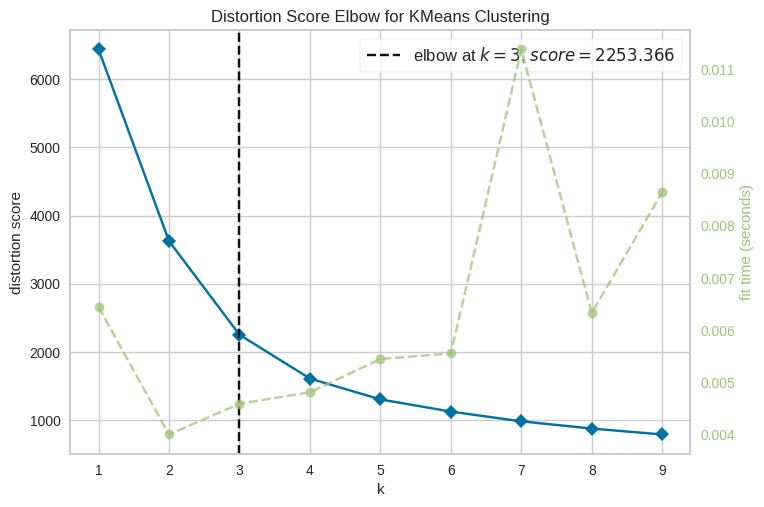

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [166]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(df_top)
visualizer.show()

In [167]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_top)
labels = kmeans.labels_

In [168]:
# Menghitung silhouette score

score = silhouette_score(df_top, labels)
print(f"Silhouette Score for k=3: {score:.4f}")

Silhouette Score for k=3: 0.4530


Berdasarkan hasil festure selection, 5 fitur terbaik untuk clustering yaitu CustomerOccupation_Engineer, CustomerOccupation_Retired, AccountBalance, CustomerAge, dan CustomerOccupation_Student memberikan nilai silhouette score sebesar 0,4530 dengan 3 cluster.

In [169]:
# Menambahkan hasil clustering sebagai kolom baru dalam dataframe
bank_df['Cluster'] = kmeans.labels_
# Mendapatkan titik centroid untuk setiap cluster
centroids = kmeans.cluster_centers_
print("Centroid setiap cluster:\n", centroids)

Centroid setiap cluster:
 [[ 4.23503326e-01 -2.41473508e-15  1.03536092e+00  1.06001681e-02
   2.54988914e-02]
 [ 1.44592953e-01  7.27825030e-01 -2.37479205e-01  1.02788667e+00
   2.38697950e-15]
 [ 1.57560356e-01 -1.49880108e-15 -9.38310247e-01 -1.08705474e+00
   8.05590851e-01]]


In [170]:
bank_df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AgeGroup,Cluster
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,60+,1
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,60+,0
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,19-30,2
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,19-30,0
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,19-30,2


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

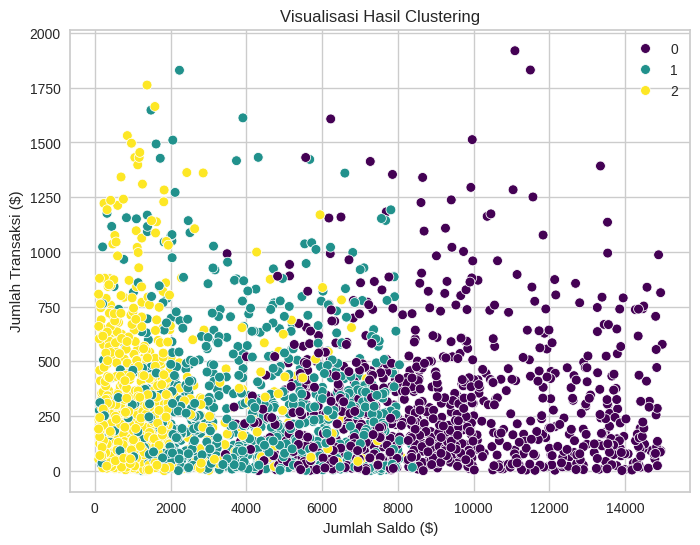

In [190]:
# Visualisasi dengan grafik scatter plot

plt.figure(figsize=(8, 6))
sns.scatterplot(x='AccountBalance', y='TransactionAmount', hue='Cluster', data=bank_df, palette='viridis', s=50)

plt.title('Visualisasi Hasil Clustering')
plt.xlabel('Jumlah Saldo ($)')
plt.ylabel('Jumlah Transaksi ($)')
plt.legend()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [172]:
# Menambahkan hasil clustering sebagai kolom baru dalam dataframe
bank_df['Cluster'] = kmeans.labels_
# Mendapatkan titik centroid untuk setiap cluster
centroids = kmeans.cluster_centers_
print("Centroid setiap cluster:\n", centroids)

Centroid setiap cluster:
 [[ 4.23503326e-01 -2.41473508e-15  1.03536092e+00  1.06001681e-02
   2.54988914e-02]
 [ 1.44592953e-01  7.27825030e-01 -2.37479205e-01  1.02788667e+00
   2.38697950e-15]
 [ 1.57560356e-01 -1.49880108e-15 -9.38310247e-01 -1.08705474e+00
   8.05590851e-01]]


In [173]:
# Inverse Channel

Channel_cols = [col for col in df_clustering.columns if col.startswith('Channel_')]
df_clustering['Channel'] = df_clustering[Channel_cols].idxmax(axis=1).str.replace('Channel_', '')
bank_df['Channel'] = df_clustering['Channel']

In [174]:
# Inverse CustomerOccupation

CustomerOccupation_cols = [col for col in df_clustering.columns if col.startswith('CustomerOccupation_')]
df_clustering['CustomerOccupation'] = df_clustering[CustomerOccupation_cols].idxmax(axis=1).str.replace('CustomerOccupation_', '')
bank_df['CustomerOccupation'] = df_clustering['CustomerOccupation']

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [175]:
# Inverse Fitur Numerik

df_clustering[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']] = scaler.inverse_transform(df_clustering[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']])
bank_df[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']] = df_clustering[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']]


In [176]:
df_clustering.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student,Channel,CustomerOccupation
0,14.09,70.0,81.0,1.0,5112.21,True,False,False,True,False,False,False,ATM,Doctor
1,376.24,68.0,141.0,1.0,13758.91,True,False,False,True,False,False,False,ATM,Doctor
2,126.29,19.0,56.0,1.0,1122.35,False,False,True,False,False,False,True,Online,Student
3,184.50,26.0,25.0,1.0,8569.06,False,False,True,False,False,False,True,Online,Student
4,13.45,26.0,198.0,1.0,7429.40,False,False,True,False,False,False,True,Online,Student


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [199]:
# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(df_clustering, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = df_clustering[labels == cluster_id]

        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_amount = cluster_data['TransactionAmount'].mean()
        min_amount = cluster_data['TransactionAmount'].min()
        max_amount = cluster_data['TransactionAmount'].max()
        median_amount = cluster_data['TransactionAmount'].median()

        mean_duration = cluster_data['TransactionDuration'].mean()
        min_duration = cluster_data['TransactionDuration'].min()
        max_duration = cluster_data['TransactionDuration'].max()
        median_duration = cluster_data['TransactionDuration'].median()

        mean_balance = cluster_data['AccountBalance'].mean()
        min_balance = cluster_data['AccountBalance'].min()
        max_balance = cluster_data['AccountBalance'].max()
        median_balance = cluster_data['AccountBalance'].median()

        mean_age = cluster_data['CustomerAge'].mean()
        min_age = cluster_data['CustomerAge'].min()
        max_age = cluster_data['CustomerAge'].max()
        median_age = cluster_data['CustomerAge'].median()

        mode_channel = cluster_data['Channel'].mode().iloc[0]
        mode_occupation = cluster_data['CustomerOccupation'].mode().iloc[0]

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata Transaction Amount: ${mean_amount:.2f}")
        print(f"Minimal Transaction Amount: ${min_amount:.2f}")
        print(f"Maksimal Transaction Amount: ${max_amount:.2f}")
        print(f"Median Transaction Amount: ${median_amount:.2f}")

        print(f"Rata-rata Transaction Duration (sec): {mean_duration:.2f}")
        print(f"Minimal Transaction Duration: {min_duration:.2f}")
        print(f"Maksimal Transaction Duration: {max_duration:.2f}")
        print(f"Median Transaction Duration: {median_duration:.2f}")

        print(f"Rata-rata Account Balance: ${mean_balance:.2f}")
        print(f"Minimal Account Balance: ${min_balance:.2f}")
        print(f"Maksimal Account Balance: ${max_balance:.2f}")
        print(f"Median Account Balance: ${median_balance:.2f}")

        print(f"Rata-rata Customer Age: {mean_age:.2f}")
        print(f"Minimal Customer Age: {min_age:.2f}")
        print(f"Maksimal Customer Age: {max_age:.2f}")
        print(f"Median Customer Age: {median_age:.2f}")

        print(f"Modus Channel: {mode_channel}")
        print(f"Modus Customer Occupation: {mode_occupation}")

# Analisis karakteristik setiap cluster
analyze_clusters(df_clustering, labels, k=3)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Transaction Amount: $289.37
Minimal Transaction Amount: $0.32
Maksimal Transaction Amount: $1919.11
Median Transaction Amount: $203.10
Rata-rata Transaction Duration (sec): 122.00
Minimal Transaction Duration: 10.00
Maksimal Transaction Duration: 300.00
Median Transaction Duration: 116.00
Rata-rata Account Balance: $9152.38
Minimal Account Balance: $3449.35
Maksimal Account Balance: $14977.99
Median Account Balance: $8842.95
Rata-rata Customer Age: 44.86
Minimal Customer Age: 18.00
Maksimal Customer Age: 70.00
Median Customer Age: 44.00
Modus Channel: Branch
Modus Customer Occupation: Doctor

Cluster 2:
Rata-rata Transaction Amount: $302.18
Minimal Transaction Amount: $0.84
Maksimal Transaction Amount: $1830.00
Median Transaction Amount: $213.37
Rata-rata Transaction Duration (sec): 116.72
Minimal Transaction Duration: 10.00
Maksimal Transaction Duration: 296.00
Median Transaction Duration: 109.00
Rata-rata Account Balance: $

### Analisis Karakteristik Cluster dari Model *KMeans*

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

Cluster 1:
- Rata-rata Transaction Amount: USD 289.37  
- Rata-rata Transaction Duration (sec): 122.00
- Rata-rata Account Balance: USD 9152.38
- Rata-rata Customer Age: 44 tahun (rentang usia 18-70 tahun)
- Analisis: Cluster ini mencakup nasabah yang termasuk ke dalam usia produktif dengan saldo tinggi, melakukan transaksi dengan nominal yang cukup wajar, dan cenderung menghabiskan waktu lebih lama untuk bertransaksi. Kelompok ini merupakan kelompok dengan nasabah yang memiliki kondisi keuangan stabil ataupun nasabah premium dengan kepemilikan yang tinggi untuk saldo tabungan dan beresiko rendah.

Cluster 2:
- Rata-rata Transaction Amount: USD 302.18  
- Rata-rata Transaction Duration (sec): 116.72  
- Rata-rata Account Balance: USD 4184.66
- Rata-rata Customer Age: 62 tahun (rentang usia 44-80 tahun)
- Analisis: Cluster kedua mencakup nasabah yang memasuki masa pensiun yang memiliki saldo dan nilai transaksi menengah serta cenderung lebih cepat saat bertransaksi. Kelompok ini dapat dikategorikan sebagai nasabah reguler. Selain itu, kecepatan saat bertransaksi mungkin dapat menunjukkan bahwa kelompok ini lebih cepat beradaptasi dan terbiasa menggunakan teknologi, seperti ATM atau layanan digital lainnya.

Cluster 3:
- Rata-rata Transaction Amount: USD 302.22  
- Rata-rata Transaction Duration (sec): 120.00  
- Rata-rata Account Balance: USD 1454.86
- Rata-rata Customer Age: 25 tahun (rentang usia 18-47 tahun)
- Analisis: Cluster ketiga mencakup nasabah yang memasuki usia dewasa/produktif yang didominasi oleh pelajar. Cluster ini memiliki nilai transaksi tinggi namun memiliki jumlah saldo rendah. Kelompok ini dapat dinilai beresiko karena adanya indikasi perilaku tidak sehat secara finansial yang sering melakukan penarikan uang atau transaksi berlebih. Selain itu, ada kemungkinan juga indikasi penipuan atas transaksi yang dilakukan sehingga diperlukan pemantauan lebih lanjut.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [193]:
bank_df.to_csv('bank_cluster.csv', index=False)

from google.colab import files
files.download('bank_cluster.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>